# **Task No 2 (Part b)**     
## Submitted by ***Aqsa Abu Bakar(400517)***

---



For text generation you are required to use the Irish Songs dataset/Shakespeare sonnets dataset. (your trained model should be able to generate text given some seed and number of next words) (test file will only contain load model and then will be given some seed text and next words as no performance metrics in text generation.) https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

## **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import nltk
import pickle
from nltk.corpus import stopwords
from tensorflow.keras.utils import plot_model
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Downloading the Dataset using Irish song Lyrics**

In [ ]:
!wget --no-check-certificate \
     https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt\
    -O /tmp/irish-lyrics-eof.txt

--2023-12-24 12:12:00--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.121.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-12-24 12:12:00 (113 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

## **Visualizing Wordcloud**
Word clouds are a useful technique in sentiment analysis for several reasons. They provide a quick overview of frequently occurring words, enabling analysts to identify prevalent sentiments or topics. Word clouds highlight key terms by highlighting them with larger font sizes, providing insights into word associations. They also help in focusing on contextual understanding by displaying words in proximity to one another.

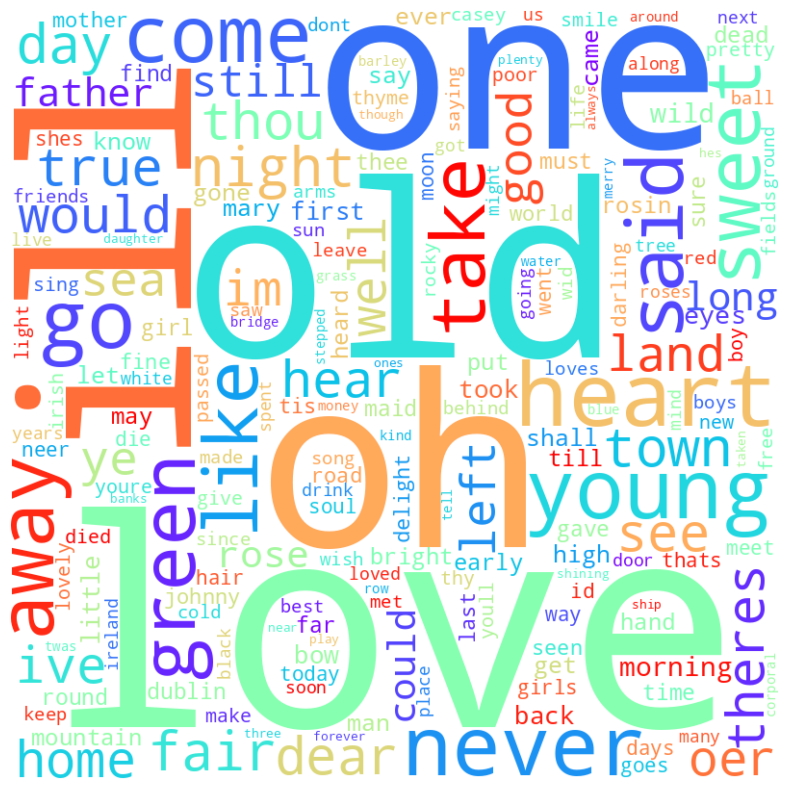

In [ ]:
# remove special characters
data = ' '.join(corpus).split()
data = [nltk.word_tokenize(i) for i in data]
data = [j for sub in data for j in sub]
data = [i for i in data if i.isalpha()]

# remove stopwords
stop_words = set(stopwords.words('english'))
data = [i for i in data if i not in stop_words]
# word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words,colormap='rainbow').generate_from_frequencies(Counter(data))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Visualizing frequency chart of words**
The frequency distribution of the top 10 words can be used to identify common sentiments, extract key indicators, and improve the accuracy and efficiency of sentiment analysis models.

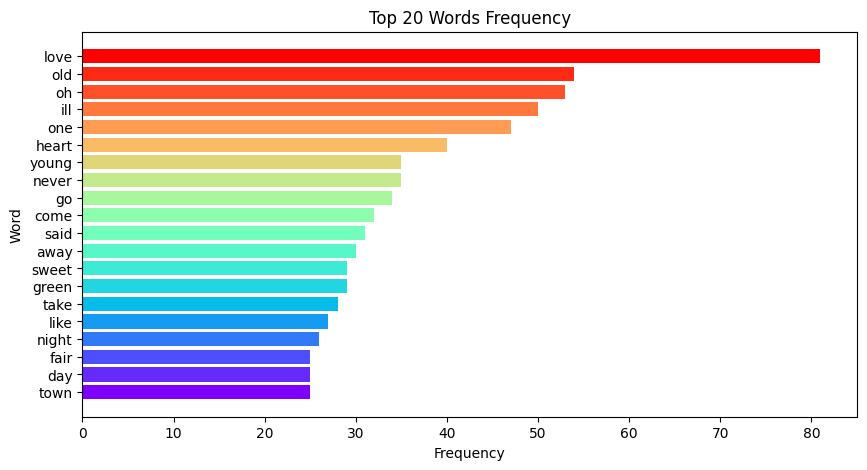

In [ ]:

# top 20 words frequency chart
word_freq = Counter(data)
top_20_words = word_freq.most_common(20)
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_20_words)))
labels = [item[0] for item in top_20_words]
values = [item[1] for item in top_20_words]

plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], values[::-1],color=colors)
plt.title('Top 20 Words Frequency')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## **Initialize the tokenize**
Tokenization, padding, sequencing, and training data are essential steps in sentiment analysis, converting textual data into a format for analysis and model training. These steps help train sentiment analysis models to identify patterns and relationships between words and sentiments.

**Tokenization:**

Tokenization involves breaking down the text into individual words or tokens.
It helps convert textual data into a format that can be used for analysis and model training.

**Padding:**

Padding ensures that all sequences (lists of tokens) have the same length.
Neural networks typically require input data of uniform length, so padding is used to add zeros or special tokens to shorter sequences.

**Sequence:**

Sequencing involves arranging the tokens in a specific order to capture the sequential nature of language.
This is crucial for tasks like sentiment analysis, where the order of words can impact the overall sentiment.

**Training Data:**

The training data is used to train a sentiment analysis model.
It consists of labeled examples where the sentiment (positive, negative, neutral) is associated with the corresponding text.
The model learns to identify patterns and relationships between words and sentiments during the training process.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
with open('/content/drive/My Drive/Aqsa Abu Bakar(DL-PojectT2a)/Token_Text_generation.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

## **Create input sequences using list of tokens**

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[: i+1]
        input_sequences.append(n_gram_sequence)

## **Pad sequences**

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))
# Save max_len to a file
with open('/content/drive/My Drive/Aqsa Abu Bakar(DL-PojectT2a)/Text_generation_len.pkl', 'wb') as max_len_file:
    pickle.dump(max_sequence_len, max_len_file)

## **Create predictors and label**

In [ ]:
xs, labels = input_sequences[:, :-1], input_sequences[:,-1]
ys = ku.to_categorical(labels, num_classes=total_words)

## **Architecture of the model**

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

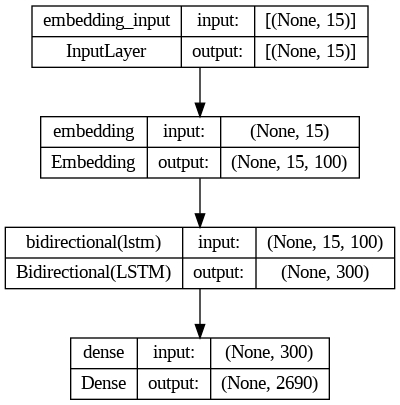

In [ ]:
#Display the model architecture in SVG format
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## **Training**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 100, verbose = 1)

Epoch 1/200
377/377 [==============================] - 16s 32ms/step - loss: 6.7658 - accuracy: 0.0650
Epoch 2/200
377/377 [==============================] - 4s 11ms/step - loss: 6.2527 - accuracy: 0.0737
Epoch 3/200
377/377 [==============================] - 4s 11ms/step - loss: 5.9845 - accuracy: 0.0842
Epoch 4/200
377/377 [==============================] - 3s 7ms/step - loss: 5.6716 - accuracy: 0.0989
Epoch 5/200
377/377 [==============================] - 3s 8ms/step - loss: 5.3196 - accuracy: 0.1156
Epoch 6/200
377/377 [==============================] - 3s 8ms/step - loss: 4.9518 - accuracy: 0.1337
Epoch 7/200
377/377 [==============================] - 5s 13ms/step - loss: 4.5817 - accuracy: 0.1595
Epoch 8/200
377/377 [==============================] - 3s 8ms/step - loss: 4.2199 - accuracy: 0.1828
Epoch 9/200
377/377 [==============================] - 3s 8ms/step - loss: 3.8603 - accuracy: 0.2227
Epoch 10/200
377/377 [==============================] - 3s 7ms/step - loss: 3.5156 - a

## **Training for how long?**

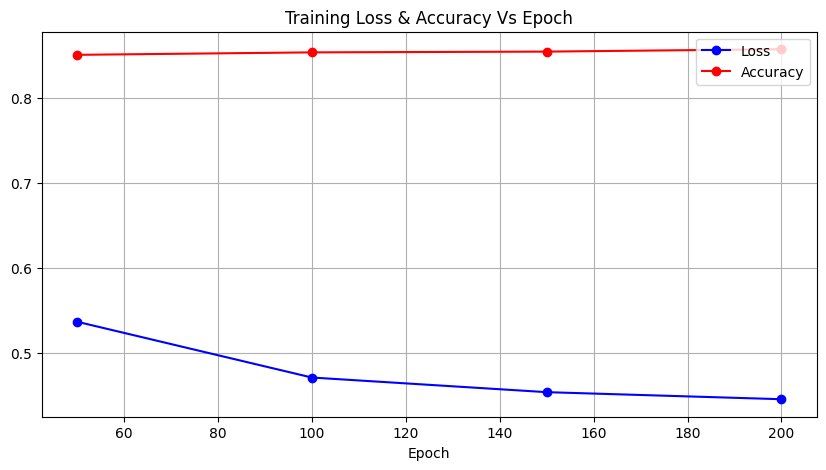

In [ ]:
import matplotlib.pyplot as plt

loss = [0.5370, 0.4714, 0.4542, 0.4459]
acc = [0.8506, 0.8535, 0.8544, 0.8572]
epoch = [50, 100, 150, 200]

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epoch, loss, marker='o', linestyle='-', color='b',label='Loss')
plt.plot(epoch, acc, marker='o', linestyle='-', color='r',label='Accuracy')
plt.title('Training Loss & Accuracy Vs Epoch')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.grid(True)
plt.show()


## **Training Accuracy Vs Loss**

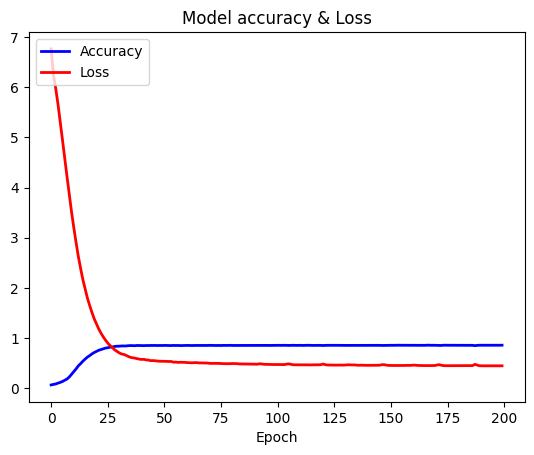

In [ ]:
import matplotlib.pyplot as plt# Plot training & validation accuracy values
# Plot training & validation accuracy values

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color='blue', linewidth=2, label='Accuracy')
plt.plot(history.history['loss'], color='red', linewidth=2, label='Loss')

plt.title('Model accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## **Save the trained model**

In [ ]:
#model.save('/content/drive/My Drive/Aqsa Abu Bakar(DL-PojectT2a)/Text_prediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
